# IPL Exploratory Data Analysis (2008 - 2016)

The following project analyses IPL data from 2008 to 2016 and is used to check if batting is preffered or fielding during toss in various stadiums in india

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 2890-EBDB

 Directory of C:\Users\kaka1\Jupyter Programs\cricket project

21-04-2023  04:26 PM    <DIR>          .
21-04-2023  04:26 PM    <DIR>          ..
21-04-2023  10:20 AM    <DIR>          .ipynb_checkpoints
20-09-2019  12:14 AM        15,442,270 deliveries.csv
21-04-2023  04:26 PM           126,324 main.ipynb
20-09-2019  12:14 AM           117,096 matches.csv
               3 File(s)     15,685,690 bytes
               3 Dir(s)  129,324,179,456 bytes free


In [3]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
# umpire3 does not contain any values so lets drop that column
matches.drop(['umpire3'], inplace = True, axis = 1)

In [7]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


Here we can see that all the NaN values in `city` column have venue as `Dubai International Cricket Stadium`, So lets change their cities to Dubai

In [8]:
matches['city'] = matches['city'].fillna("DUBAI")

In [9]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

## Visualizing the Data

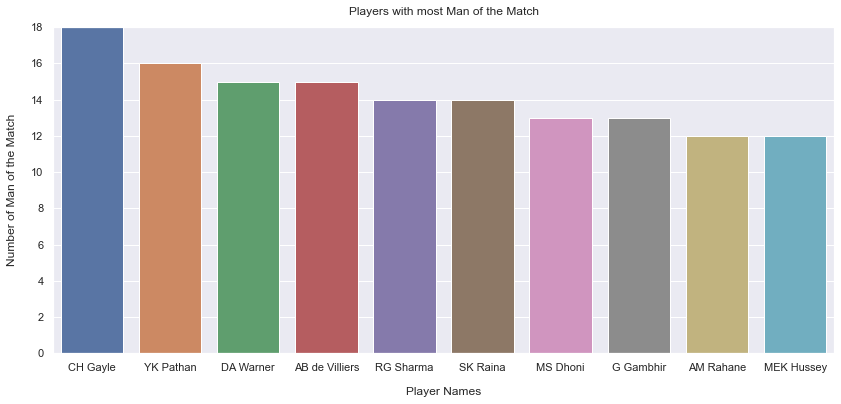

In [30]:
plt.figure(figsize=(14,6))
sns.set()
sns.barplot(x = list(matches['player_of_match'].value_counts()[0:10].keys()),
            y = matches['player_of_match'].value_counts()[0:10])
plt.xlabel("Player Names",labelpad=14)
plt.ylabel("Number of Man of the Match",labelpad=14)
plt.ylim((0,18))
plt.title("Players with most Man of the Match",pad = 12)
plt.show()

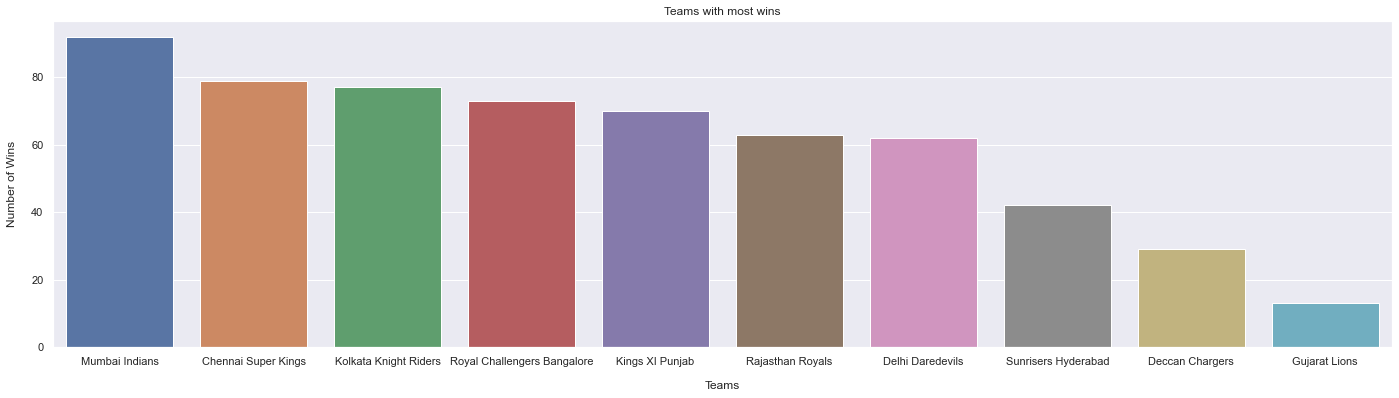

In [15]:
plt.figure(figsize=(24,6))
sns.set()
sns.barplot(x = list(matches['winner'].value_counts()[0:10].keys()),
            y = matches['winner'].value_counts()[0:10],
           )
plt.xlabel("Teams",labelpad=14)
plt.ylabel("Number of Wins",labelpad=14)
plt.title("Teams with most wins")
plt.show()


In [16]:
# Number of Times a team which has the toss has also won the match
np.sum(matches['toss_winner'] == matches['winner'])

325

In [17]:
# Percentage of winning a match if the team has won the toss
print('%.2f' % ((np.sum(matches['toss_winner'] == matches['winner'])/ matches.shape[0])*100),'%')

51.10 %


Decion to Bat or Field


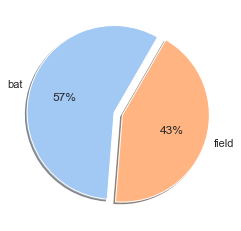

In [35]:
# Toss Decisions
bat = matches['toss_decision'].value_counts()[0]
field = matches['toss_decision'].value_counts()[1]

plt.pie([bat,field],labels=['bat','field'], colors=sns.color_palette('pastel'), autopct='%.0f%%',shadow = True,startangle=60, explode = (0.1,0))
print('Decion to Bat or Field')
plt.show()

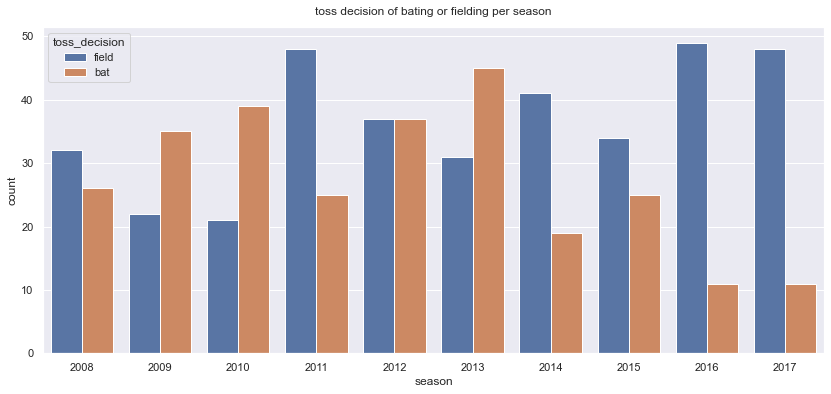

In [34]:
plt.subplots(figsize=(14,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.title('toss decision of bating or fielding per season',pad = 12)
plt.show()

***

### Toss Decision per Stadium (Interactive) 

In [20]:
import ipywidgets as ipyw

In [21]:
def plot_venue(venue):
    v = matches.loc[matches['venue'] == venue]
    sns.countplot(x='season',hue='toss_decision',data=v)
    plt.show()

In [22]:
venues = list(matches['venue'].unique())

### Interactive Dashboard

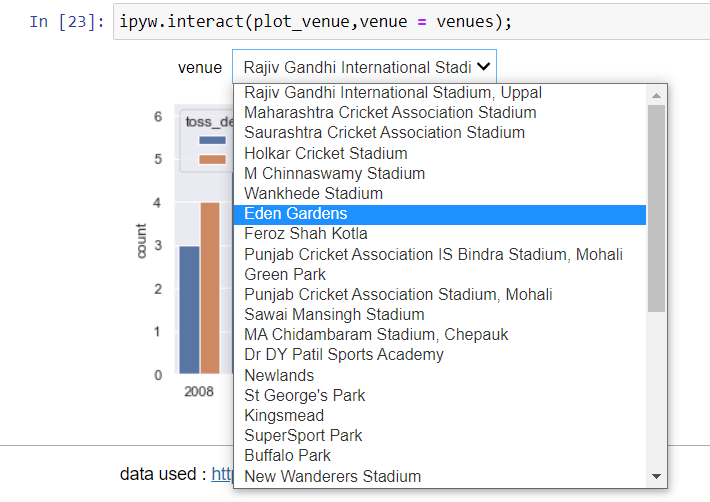

In [23]:
ipyw.interact(plot_venue,venue = venues);

interactive(children=(Dropdown(description='venue', options=('Rajiv Gandhi International Stadium, Uppal', 'Mah…

data used : https://www.kaggle.com/datasets/manasgarg/ipl